## IMPORTING THE REQUIRED MODULES :

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Imported all the nessecary modules for further applications.

## READING THE EXCEL FILE (.xlsx)

In [2]:
dataset = pd.read_excel('C:/Users/ANIKET GAIKWAD/Desktop/loan.xlsx')

In [3]:
dataset.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,f,0.0,...,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,f,0.0,...,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## DATA CLEANING : 

 Removed the columns having most of the null values.

In [4]:
loandata = dataset[['loan_amnt','term','int_rate','installment','grade',
                    'emp_length','purpose','home_ownership','annual_inc','addr_state',
                    'verification_status','delinq_2yrs','inq_last_6mths',
                    'open_acc','pub_rec','revol_bal','revol_util','total_acc',
                    'pub_rec_bankruptcies','loan_status']]


In [5]:
essen = loandata[['open_acc','pub_rec','revol_bal','revol_util','total_acc','pub_rec_bankruptcies','loan_status']]
essen.head()

,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status
0,3,0,13648,0.837,9,0.0,Fully Paid
1,3,0,1687,0.094,4,0.0,Charged Off
2,2,0,2956,0.985,10,0.0,Fully Paid
3,10,0,5598,0.210,37,0.0,Fully Paid
4,15,0,27783,0.539,38,0.0,Current


In [6]:
loandata.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,purpose,home_ownership,annual_inc,addr_state,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status
0,5000,36 months,0.1065,162.87,B,10+ years,credit_card,RENT,24000.0,AZ,Verified,0,1,3,0,13648,0.837,9,0.0,Fully Paid
1,2500,60 months,0.1527,59.83,C,< 1 year,car,RENT,30000.0,GA,Source Verified,0,5,3,0,1687,0.094,4,0.0,Charged Off


In [7]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
loan_amnt               39717 non-null int64
term                    39717 non-null object
int_rate                39717 non-null float64
installment             39717 non-null float64
grade                   39717 non-null object
emp_length              38642 non-null object
purpose                 39717 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
addr_state              39717 non-null object
verification_status     39717 non-null object
delinq_2yrs             39717 non-null int64
inq_last_6mths          39717 non-null int64
open_acc                39717 non-null int64
pub_rec                 39717 non-null int64
revol_bal               39717 non-null int64
revol_util              39667 non-null float64
total_acc               39717 non-null int64
pub_rec_bankruptcies    39020 non-null float64
loan_status        

Randomization was carried out so that data can become more relateble to each other.

In [8]:
loandata['purpose'] = loandata['purpose'].map({'debt_consolidation':int('0'),'credit_card':int('1'),'other':int('2'),'home_improvement':int('3'),     
'major_purchase':int('4'),         
'small_business':int('5'),      
'car':int('6'),                 
'wedding':int('7'),                 
'medical':int('8'),     
'house':int('9'),               
'vacation':int('10'),        
'educational':int('11'),         
'renewable_energy':int('12')})

In [9]:
#loandata['loan_status'] = loandata['loan_status'].replace({'Fully Paid':int('0'),'Charged Off':int('1'),'Current':int('2')})
loandata['grade'] = loandata['grade'].map({'A':int('1'),'B':int('2'),'C':int('3'),'D':int('4'),'E':int('5'),'F':int('6'),'G':int('7')})
loandata['home_ownership'] = loandata['home_ownership'].replace({'MORTGAGE':int('6'),'RENT':int('5'),'OWN':int('4'),'OTHER':int('3'),'NONE':int('2'),'ANY':int('1')})
loandata["emp_length"] = loandata["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','NaN':int('0')}, regex = True)
loandata["term"] = loandata["term"].replace({'36 months':'1','60 months':'0'},regex = True)
loandata['verification_status'] = loandata['verification_status'].replace({'Verified':int('2'),'Source Verified':int('1'),'Not Verified':int('0')})
loandata['term'] = loandata['term'].astype(int)


loandata['int_rate'] = loandata['int_rate']*100
#loandata['home_ownership'] = loandata['home_ownership'].astype(int)
print("Current shape of dataset :",loandata.shape)


Current shape of dataset : (39717, 20)


In [10]:
target = 'loan_status'
loandata.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,purpose,home_ownership,annual_inc,addr_state,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status
0,5000,1,10.65,162.87,2,10,1.0,5,24000.0,AZ,2,0,1,3,0,13648,0.837,9,0.0,Fully Paid
1,2500,0,15.27,59.83,3,1,6.0,5,30000.0,GA,1,0,5,3,0,1687,0.094,4,0.0,Charged Off
2,2400,1,15.96,84.33,3,10,5.0,5,12252.0,IL,0,0,2,2,0,2956,0.985,10,0.0,Fully Paid
3,10000,1,13.49,339.31,3,10,2.0,5,49200.0,CA,1,0,1,10,0,5598,0.210,37,0.0,Fully Paid
4,3000,0,12.69,67.79,2,1,2.0,5,80000.0,OR,1,0,0,15,0,27783,0.539,38,0.0,Current


In [11]:
loandata['purpose'] = loandata['purpose'].astype(float)

## FILLING THE MISSING VALUES IN THE DATASET : 

Mean values of each column were calculated.

In [12]:
loandata.mean()

loan_amnt               11219.443815
term                        0.732583
int_rate                   12.021177
installment               324.561922
grade                       2.577309
purpose                     1.876859
home_ownership              5.362464
annual_inc              68968.926377
verification_status         0.896468
delinq_2yrs                 0.146512
inq_last_6mths              0.869200
open_acc                    9.294408
pub_rec                     0.055065
revol_bal               13382.528086
revol_util                  0.488322
total_acc                  22.088828
pub_rec_bankruptcies        0.043260
dtype: float64

Null values present in the dataset where replaced with the mean values of the respective columns.

In [13]:
loandata['emp_length'] = loandata['emp_length'].astype(float)
loandata = loandata.fillna(loandata.mean().astype(int))

In [14]:
loandata['emp_length'] = loandata['emp_length'].astype(int)
loandata['purpose'] = loandata['purpose'].astype(int)
loandata['pub_rec_bankruptcies'].astype(int)
loandata1 = loandata.head(39717)
loandata1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,purpose,home_ownership,annual_inc,addr_state,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status
0,5000,1,10.65,162.87,2,10,1,5,24000.0,AZ,2,0,1,3,0,13648,0.837,9,0.0,Fully Paid
1,2500,0,15.27,59.83,3,1,6,5,30000.0,GA,1,0,5,3,0,1687,0.094,4,0.0,Charged Off
2,2400,1,15.96,84.33,3,10,5,5,12252.0,IL,0,0,2,2,0,2956,0.985,10,0.0,Fully Paid
3,10000,1,13.49,339.31,3,10,2,5,49200.0,CA,1,0,1,10,0,5598,0.210,37,0.0,Fully Paid
4,3000,0,12.69,67.79,2,1,2,5,80000.0,OR,1,0,0,15,0,27783,0.539,38,0.0,Current


An copy of the dataset was created and saved for further.

In [15]:
datamain = loandata1.to_csv(index=False)
f = open("datamain.csv","w+")
f.write(datamain)
f.close()
loandata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
loan_amnt               39717 non-null int64
term                    39717 non-null int32
int_rate                39717 non-null float64
installment             39717 non-null float64
grade                   39717 non-null int64
emp_length              39717 non-null int32
purpose                 39717 non-null int32
home_ownership          39717 non-null int64
annual_inc              39717 non-null float64
addr_state              39717 non-null object
verification_status     39717 non-null int64
delinq_2yrs             39717 non-null int64
inq_last_6mths          39717 non-null int64
open_acc                39717 non-null int64
pub_rec                 39717 non-null int64
revol_bal               39717 non-null int64
revol_util              39717 non-null float64
total_acc               39717 non-null int64
pub_rec_bankruptcies    39717 non-null float64
loan_status             3

## CREATING A DATASET WITH LOAN STATUS AS PAID OFF AND CHARGED OFF ONLY : 

In [16]:
loandata1['pub_rec_bankruptcies'].astype(int)
loandata1['purpose'] = loandata1['purpose'].map({int('0') :'debt_consolidation',int('1'):'credit_card',
                                                 int('2'):'other',int('3'):'home_improvement',     
int('4'):'major_purchase',         
int('5'):'small_business',      
int('6'):'car',                 
int('7'):'wedding',                 
int('8'):'medical',     
int('9'):'house',               
int('10'):'vacation',        
int('11'):'educational',         
int('12'):'renewable_energy'})

paidoff = loandata1[loandata1['loan_status']=='Fully Paid'].head(50000)
chargedoff = loandata1[loandata1['loan_status']=='Charged Off'].head(50000)
loandata2 = pd.concat([paidoff,chargedoff])

loandata2.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,purpose,home_ownership,annual_inc,addr_state,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status
0,5000,1,10.65,162.87,2,10,credit_card,5,24000.0,AZ,2,0,1,3,0,13648,0.837,9,0.0,Fully Paid
2,2400,1,15.96,84.33,3,10,small_business,5,12252.0,IL,0,0,2,2,0,2956,0.985,10,0.0,Fully Paid
3,10000,1,13.49,339.31,3,10,other,5,49200.0,CA,1,0,1,10,0,5598,0.210,37,0.0,Fully Paid
5,5000,1,7.90,156.46,1,3,wedding,5,36000.0,AZ,1,0,3,9,0,7963,0.283,12,0.0,Fully Paid
6,7000,0,15.96,170.08,3,8,debt_consolidation,5,47004.0,NC,0,0,1,7,0,17726,0.856,11,0.0,Fully Paid


In [17]:
emp2 = pd.DataFrame(loandata2['open_acc'].value_counts())
emp2 = emp2.reset_index()
emp2.rename(columns={'index':'len'}, inplace=True)
emp2 = emp2.sort_values('len')
emp2.head(5)

,len,open_acc
15,2,596
10,3,1470
7,4,2300
4,5,3111
1,6,3846


In [18]:
loandata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39688
Data columns (total 20 columns):
loan_amnt               38577 non-null int64
term                    38577 non-null int32
int_rate                38577 non-null float64
installment             38577 non-null float64
grade                   38577 non-null int64
emp_length              38577 non-null int32
purpose                 38577 non-null object
home_ownership          38577 non-null int64
annual_inc              38577 non-null float64
addr_state              38577 non-null object
verification_status     38577 non-null int64
delinq_2yrs             38577 non-null int64
inq_last_6mths          38577 non-null int64
open_acc                38577 non-null int64
pub_rec                 38577 non-null int64
revol_bal               38577 non-null int64
revol_util              38577 non-null float64
total_acc               38577 non-null int64
pub_rec_bankruptcies    38577 non-null float64
loan_status             

## CREATING A DATASET FOR DEFAULTERS ONLY :  

In [19]:
default = loandata2[loandata2['loan_status']=='Charged Off']
default.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,purpose,home_ownership,annual_inc,addr_state,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status
1,2500,0,15.27,59.83,3,1,car,5,30000.0,GA,1,0,5,3,0,1687,0.094,4,0.0,Charged Off
8,5600,0,21.28,152.39,6,4,small_business,4,40000.0,CA,1,0,2,11,0,5210,0.326,13,0.0,Charged Off
9,5375,0,12.69,121.45,2,1,other,5,15000.0,TX,2,0,0,2,0,9279,0.365,3,0.0,Charged Off
12,9000,1,13.49,305.38,3,1,debt_consolidation,5,30000.0,VA,1,0,1,4,0,10452,0.917,9,0.0,Charged Off
14,10000,1,10.65,325.74,2,3,other,5,100000.0,CA,1,0,2,14,0,11997,0.555,29,0.0,Charged Off


In [20]:
loan1 = default[['loan_amnt','term']]
rgsavg1 = loan1.groupby(['term']).sum().reset_index()

## CREATING A DATASET FOR NON-DEFAULTERS ONLY : 

In [21]:
paidoff1 = loandata2[loandata2['loan_status']=='Fully Paid']
paidoff1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,purpose,home_ownership,annual_inc,addr_state,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status
0,5000,1,10.65,162.87,2,10,credit_card,5,24000.0,AZ,2,0,1,3,0,13648,0.837,9,0.0,Fully Paid
2,2400,1,15.96,84.33,3,10,small_business,5,12252.0,IL,0,0,2,2,0,2956,0.985,10,0.0,Fully Paid
3,10000,1,13.49,339.31,3,10,other,5,49200.0,CA,1,0,1,10,0,5598,0.210,37,0.0,Fully Paid
5,5000,1,7.90,156.46,1,3,wedding,5,36000.0,AZ,1,0,3,9,0,7963,0.283,12,0.0,Fully Paid
6,7000,0,15.96,170.08,3,8,debt_consolidation,5,47004.0,NC,0,0,1,7,0,17726,0.856,11,0.0,Fully Paid


## PIE CHART SHOWING THE GRADE WITH NUMBER OF DEFAULTERS :

In [22]:
datadef = [['A',602],['B',1425],['C',1347],['D',1118],['E',715],['F',319],['G',101]]
dfdef = pd.DataFrame(datadef,columns=['grade','defaulters'])
print(dfdef)

  grade  defaulters
0     A         602
1     B        1425
2     C        1347
3     D        1118
4     E         715
5     F         319
6     G         101


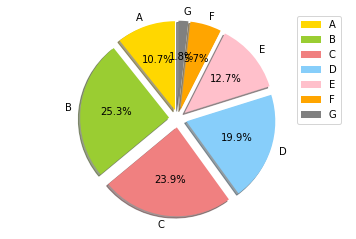

In [23]:
labels = 'A','B','C','D','E','F','G'
sizes = [602, 1425, 1347, 1118,715,319,101]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','orange','grey']
explode = (0.1,.1,0.1,0.1,0.1,0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

## OBTAINING INSIGHTS WITH THE HELP OF GRADES :

Well this way is not the efficient one but i'll learn optimized way of coding soon.

In [24]:
gradea =loandata2[loandata2['grade']==1].head(50000)
gradeb = loandata2[loandata2['grade']==2].head(50000)
gradec = loandata2[loandata2['grade']==3].head(50000)
graded = loandata2[loandata2['grade']==4].head(50000)
gradee = loandata2[loandata2['grade']==5].head(50000)
gradef = loandata2[loandata2['grade']==6].head(50000)
gradeg = loandata2[loandata2['grade']==7].head(50000)
gradeb1 = gradeb[gradeb['loan_status']=='Charged Off'].head(50000)
gradec1 = gradec[gradec['loan_status']=='Charged Off'].head(50000)
graded1 = graded[graded['loan_status']=='Charged Off'].head(50000)
gradee1 = gradee[gradee['loan_status']=='Charged Off'].head(50000)
gradef1 = gradef[gradef['loan_status']=='Charged Off'].head(50000)
gradeg1 = gradeg[gradeg['loan_status']=='Charged Off'].head(50000)
gradeb2 = gradeb[gradeb['loan_status']=='Fully Paid'].head(50000)
gradec2 = gradec[gradec['loan_status']=='Fully Paid'].head(50000)
graded2 = graded[graded['loan_status']=='Fully Paid'].head(50000)
gradee2 = gradee[gradee['loan_status']=='Fully Paid'].head(50000)
gradef2 = gradef[gradef['loan_status']=='Fully Paid'].head(50000)
gradeg2 = gradeg[gradeg['loan_status']=='Fully Paid'].head(50000)
gradea2 = gradea[gradea['loan_status']=='Fully Paid'].head(50000)
gradea1 = gradea[gradea['loan_status']=='Fully Paid'].head(50000)
a3 = gradea1['annual_inc'].mean()
b3 = gradeb1['annual_inc'].mean()
c3 = gradec1['annual_inc'].mean()
d3 = graded1['annual_inc'].mean()
e3 = gradee1['annual_inc'].mean()
f3 = gradef1['annual_inc'].mean()
g3 = gradeg1['annual_inc'].mean()
a4 = gradea2['annual_inc'].mean()
b4 = gradeb2['annual_inc'].mean()
c4 = gradec2['annual_inc'].mean()
d4 = graded2['annual_inc'].mean()
e4 = gradee2['annual_inc'].mean()
f4 = gradef2['annual_inc'].mean()
g4 = gradeg2['annual_inc'].mean()
a = gradea['loan_amnt'].mean()
b = gradeb['loan_amnt'].mean()
c = gradec['loan_amnt'].mean()
d = graded['loan_amnt'].mean()
e = gradee['loan_amnt'].mean()
f = gradef['loan_amnt'].mean()
g = gradeg['loan_amnt'].mean()



## REPRESENTATION OF THE AVERAGE LOAN AMOUNT WITH RESPECT TO THE LOAN TERM FOR DEFAULTERS ONLY :

In [25]:
datadef1 = [['36 Months',15755.82],['60 Months',9388.72]]
dfdef1 = pd.DataFrame(datadef1,columns=['Term','Avg_Loan_amnt'])

In [26]:
dfdef1.head()

,Term,Avg_Loan_amnt
0,36 Months,15755.82
1,60 Months,9388.72


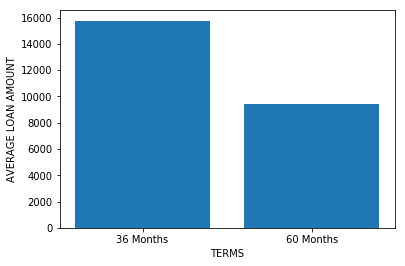

In [27]:
y = dfdef1['Avg_Loan_amnt']
x = dfdef1['Term']
plt.bar(x,y)
plt.xlabel('TERMS', fontsize=10)
plt.ylabel('AVERAGE LOAN AMOUNT', fontsize=10)
plt.show()

## REPRESENTAION OF RELATION BETWEEN EXPERIENCE(IN YEARS) WITH NO. OF DEFAULTERS :

In [28]:
emp = pd.DataFrame(default['emp_length'].value_counts())
emp = emp.reset_index()
emp.rename(columns={'index':'len'}, inplace=True)
emp = emp.sort_values('len')
emp.head()

,len,emp_length
1,1,1095
3,2,567
4,3,555
5,4,462
2,5,686


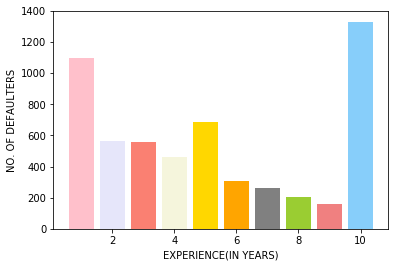

In [29]:
y = emp['emp_length']
x = emp['len']
plt.bar(x,y,color=['pink', 'lavender', 'salmon', 'beige', 'gold','orange','grey', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.xlabel('EXPERIENCE(IN YEARS)', fontsize=10)
plt.ylabel('NO. OF DEFAULTERS', fontsize=10)
plt.show()


## PIE CHART SHOWING THE PERCENTAGE OF DEFAULTERS ACCORDING TO THE TERM : 

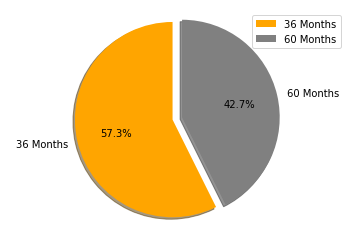

In [30]:
labels = '36 Months','60 Months'
sizes = [3227, 2400]
colors = ['orange','grey']
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

## REPRESENTATION FOR NUMBER OF DEFAULTERS WITH NO. OF DELINQED ACCOUNTS  : 

In [31]:
delq = pd.DataFrame(default['delinq_2yrs'].value_counts())
delq = delq.reset_index()
delq.rename(columns={'index':'len'}, inplace=True)
delq = delq.sort_values('len')
delq =delq.drop(delq.index[[0]])
deq = delq.head()
deq.head()

,len,delinq_2yrs
1,1,507
2,2,130
3,3,35
4,4,13
5,5,3


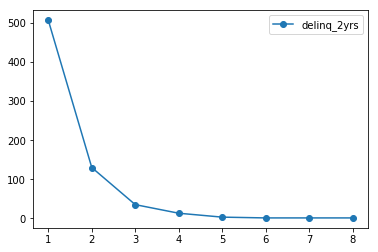

In [32]:
y = delq['delinq_2yrs']
x = delq['len']
plt.plot( 'len', 'delinq_2yrs', data=delq, linestyle='-', marker='o')
plt.legend(loc='best')
plt.show()

## BAR PLOT SHOWING THE RELATION BETWEEN ANNUAL INCOME AND GRADE ACCORDING TO THE LOAN STATUS : 

Text(0, 0.5, 'AVERAGE ANNUAL INCOME')

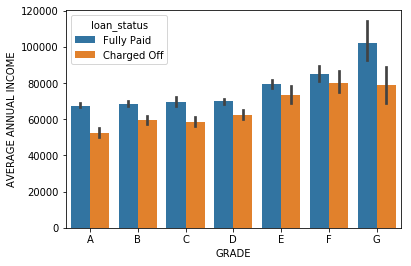

In [33]:
s = sns.barplot(x='grade', y='annual_inc', data=loandata2,hue = 'loan_status')
xlabels = 'A','B','C','D','E','F','G'
s.set_xticklabels(xlabels)
plt.xlabel('GRADE')
plt.ylabel('AVERAGE ANNUAL INCOME')


## HORIZONTAL BAR PLOT FOR SHOWING THE RELATION OF NO. OF DEFAULTERS WITH NO. OF OPEN CREDIT LINES : 

In [34]:
emp1 = pd.DataFrame(default['open_acc'].value_counts())
emp1 = emp1.reset_index()
emp1.rename(columns={'index':'len'}, inplace=True)
emp1 = emp1.sort_values('len')
emp1.head()

,len,open_acc
13,2,127
10,3,258
7,4,364
5,5,425
2,6,543


Text(0, 0.5, 'NO. OF OPEN CREDIT LINES')

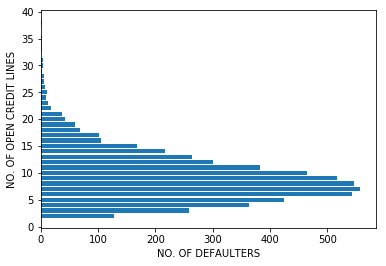

In [35]:
x = emp1['open_acc']
y = emp1['len']
plt.barh(y, x)
plt.xlabel('NO. OF DEFAULTERS', fontsize=10)
plt.ylabel('NO. OF OPEN CREDIT LINES', fontsize=10)

## PIE CHART SHOWING THE PERCENTAGE OF DEFAULTERS ACCORDING TO THE VERIFICATION STATUS : 

In [36]:
ver =pd.DataFrame(default['verification_status'].value_counts())
ver = ver.reset_index()
ver.rename(columns={'index':'len'}, inplace=True)
ver = ver.sort_values('len')
ver.head()

,len,verification_status
0,0,2142
2,1,1434
1,2,2051


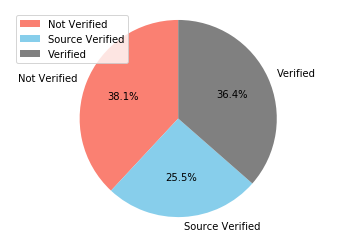

In [37]:
labels = 'Not Verified','Source Verified','Verified'
sizes = [2142,1434,2051 ]
colors = ['salmon','skyblue','grey']
explode = (0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
autopct='%0.1f%%', shadow=False, startangle=90)
plt.legend(labels, loc="upper left")
plt.axis('equal')
plt.show()

## LOAN PURPOSE FOR THE PEOPLE HAVING LOAN STATUS AS CHARGED OFF(DEFAULTERS): 

In [38]:
pur =pd.DataFrame(default['purpose'].value_counts())
pur = pur.reset_index()
pur.rename(columns={'index':'len'}, inplace=True)
pur = pur.sort_values('len')
pur.head(20)

,len,purpose
6,car,160
1,credit_card,634
0,debt_consolidation,2767
10,educational,56
4,home_improvement,347
9,house,59
5,major_purchase,222
7,medical,106
2,other,633
12,renewable_energy,19


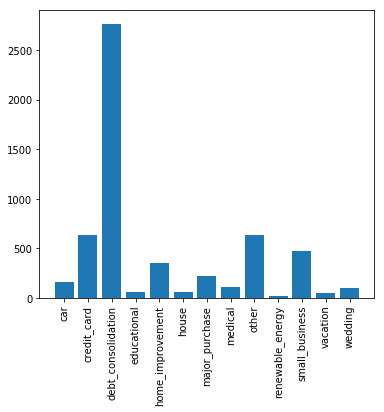

In [39]:
height = pur['purpose']
bars = pur['len']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0, top=1)
plt.show()

## PIE CHART FOR NO. OF DEFAULTERS ACCORDING TO THEIR HOUSE OWNERSHIP : 

In [40]:
home =pd.DataFrame(default['home_ownership'].value_counts())
home = home.reset_index()
home.rename(columns={'index':'len'}, inplace=True)
home = home.sort_values('len')
home.head(10)

,len,home_ownership
3,3,18
2,4,443
0,5,2839
1,6,2327


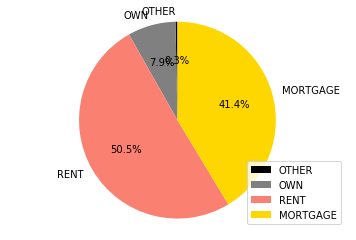

In [41]:
labels = 'OTHER','OWN','RENT','MORTGAGE'
sizes = [18,443,2839,2327]
colors = ['black','grey','salmon','gold']
explode = (0,0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
autopct='%0.1f%%', shadow=False, startangle=90)
plt.legend(labels, loc="lower right")
plt.axis('equal')
plt.show()

## LINE PLOT FOR NO. OF DEFAULTERS WITH RESPECT TO NO. OF ENQUIRIES IN LAST 6 MONTHS : 

In [42]:
home1 =pd.DataFrame(default['inq_last_6mths'].value_counts())
home1 = home1.reset_index()
home1.rename(columns={'index':'len'}, inplace=True)
home1 = home1.sort_values('len')
home1.head(10)

,len,inq_last_6mths
0,0,2280
1,1,1677
2,2,943
3,3,619
4,4,51
5,5,28
6,6,16
7,7,10
8,8,3


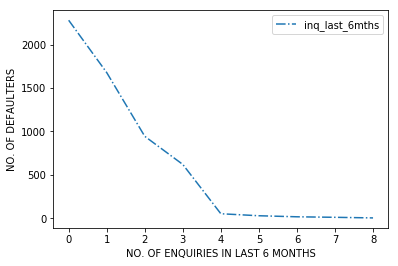

In [43]:
plt.plot( 'len', 'inq_last_6mths', data=home1, linestyle='-.',color='C0')
plt.xlabel('NO. OF ENQUIRIES IN LAST 6 MONTHS', fontsize=10)
plt.ylabel('NO. OF DEFAULTERS', fontsize=10)
plt.legend()
plt.show()

## PIE CHART FEATURING NO. OF BANKRUPTCY OCCURED FOR DEFAULTERS AND NON-DEFAULTERS :

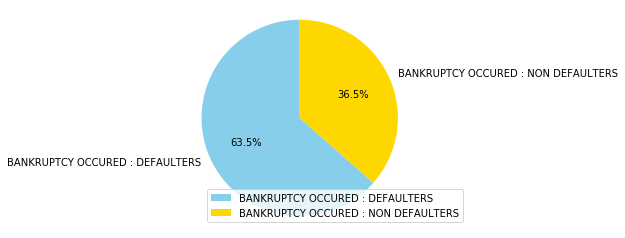

In [44]:
labels = 'BANKRUPTCY OCCURED : DEFAULTERS','BANKRUPTCY OCCURED : NON DEFAULTERS'
sizes = [6.9975,4.0219]
colors = ['skyblue','gold']
explode = (0,0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
autopct='%0.1f%%', shadow=False, startangle=90)
plt.legend(labels, loc="lower right")
plt.axis('equal')
plt.show()